In [7]:
import pandas as pd 
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt 

In [8]:
conn = sqlite3.connect('twitch.db')

In [9]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


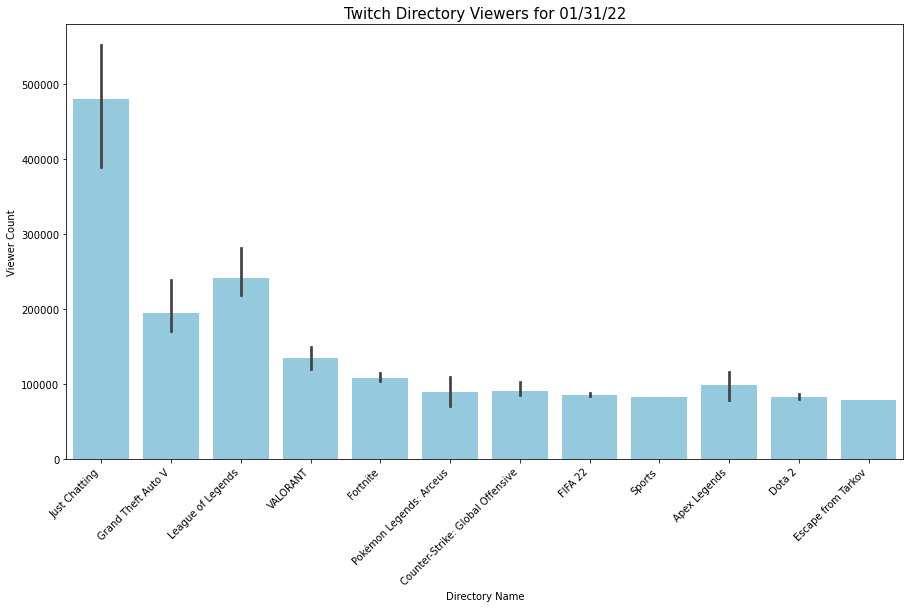

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x= twitch_data['Directory Name'], y=twitch_data['Viewer Count'], color='skyblue')
plt.xticks(rotation=45,ha='right')
plt.title('Twitch Directory Viewers for 01/31/22', fontsize=15)
plt.show()

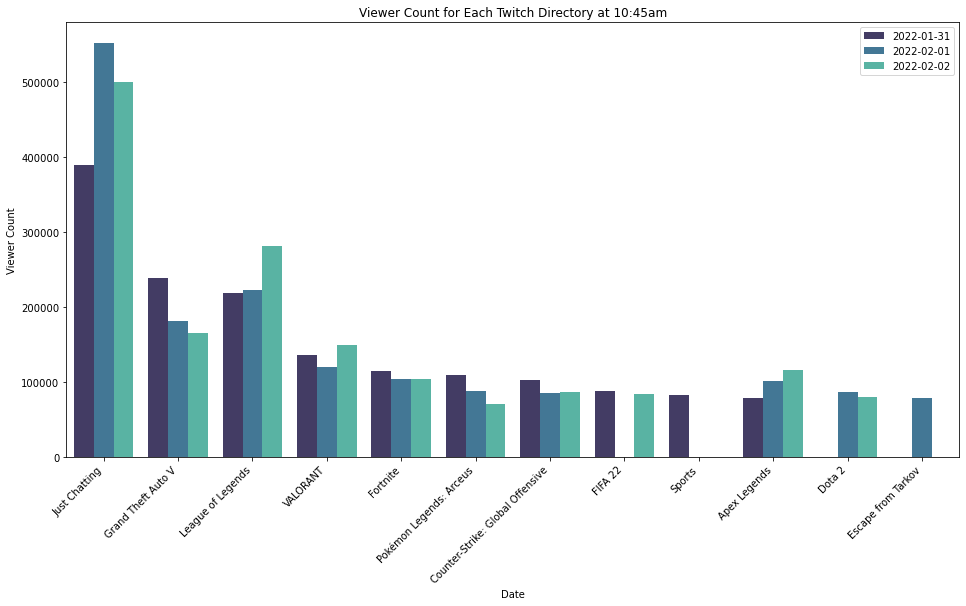

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(x= twitch_data['Directory Name'], y=twitch_data['Viewer Count'], hue=twitch_data['Date'], palette='mako', ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Viewer Count for Each Twitch Directory at 10:45am')
plt.xlabel('Date')
plt.ylabel('Viewer Count')
plt.legend(loc=('upper right'))
plt.show()

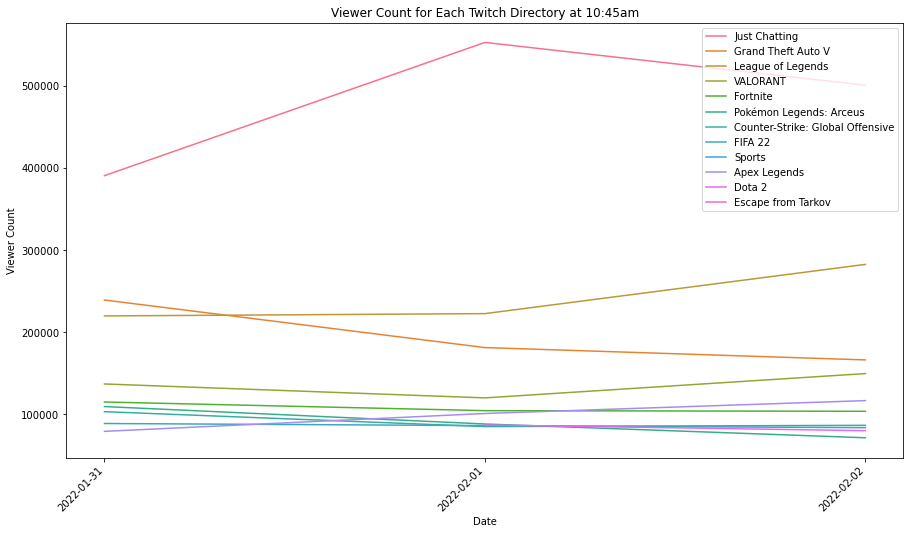

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(x= twitch_data['Date'], y=twitch_data['Viewer Count'], hue=twitch_data['Directory Name'])
plt.xticks(rotation=45,ha='right')
plt.title('Viewer Count for Each Twitch Directory at 10:45am')
plt.xlabel('Date')
plt.ylabel('Viewer Count')
plt.legend(loc=('upper right'))
plt.show()